In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_excel('properties.xlsx')
df.head()

,property type,bedrooms,bathrooms,area,address,price
0,Apartment,3,3,239,"The Fourteen Golf Residences, Uptown Cairo, Mo...",4860000
1,Villa,4,4,571,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",10000000
2,Apartment,2,2,134,"IL Bosco, New Capital Compounds, New Capital C...",100000
3,iVilla,3,3,324,"Mountain View Hyde Park, 5th Settlement Compou...",3800000
4,Villa,5,6,560,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",26000000


In [2]:
df.shape

(7879, 6)

In [3]:
df.isnull().sum()

property type    0
bedrooms         5
bathrooms        4
area             0
address          0
price            0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

property type    0
bedrooms         0
bathrooms        0
area             0
address          0
price            0
dtype: int64

In [5]:
df.duplicated().sum()

617

In [6]:
df.drop_duplicates()

,property type,bedrooms,bathrooms,area,address,price
0,Apartment,3,3,239,"The Fourteen Golf Residences, Uptown Cairo, Mo...",4860000
1,Villa,4,4,571,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",10000000
2,Apartment,2,2,134,"IL Bosco, New Capital Compounds, New Capital C...",100000
3,iVilla,3,3,324,"Mountain View Hyde Park, 5th Settlement Compou...",3800000
4,Villa,5,6,560,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",26000000
...,...,...,...,...,...,...
7874,Villa,4,4,360,"Villette, 5th Settlement Compounds, The 5th Se...",15000000
7875,Apartment,3,2,205,"Nagib Al Rehani St., Rehab City Third Phase, A...",1300000
7876,Penthouse,3,2,167,"Kayan, Sheikh Zayed Compounds, Sheikh Zayed Ci...",2800000
7877,Chalet,3,3,100,"Hacienda Bay, Sidi Abdel Rahman, North Coast",2500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7874 entries, 0 to 7878
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property type  7874 non-null   object
 1   bedrooms       7874 non-null   object
 2   bathrooms      7874 non-null   object
 3   area           7874 non-null   int64 
 4   address        7874 non-null   object
 5   price          7874 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 430.6+ KB


In [8]:
# fixing some issues to get the quanintive rows ready to be converted

df.replace('7+', '7', inplace=True)
df.replace('studio', '0', inplace=True)
df.replace('N/A', 0, inplace=True)
df.replace('none', 0, inplace=True)


In [9]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7874 entries, 0 to 7878
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property type  7874 non-null   object
 1   bedrooms       7874 non-null   int64 
 2   bathrooms      7874 non-null   int64 
 3   area           7874 non-null   int64 
 4   address        7874 non-null   object
 5   price          7874 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 430.6+ KB


In [10]:
#Break down the address

df['compound'] = df['address'].str.split(",").str[0]
df['district'] = df['address'].str.split(",").str[1]
df['city'] = df['address'].str.split(",").str[-1]
df.head()

,property type,bedrooms,bathrooms,area,address,price,compound,district,city
0,Apartment,3,3,239,"The Fourteen Golf Residences, Uptown Cairo, Mo...",4860000,The Fourteen Golf Residences,Uptown Cairo,Cairo
1,Villa,4,4,571,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",10000000,Allegria,Sheikh Zayed Compounds,Giza
2,Apartment,2,2,134,"IL Bosco, New Capital Compounds, New Capital C...",100000,IL Bosco,New Capital Compounds,Cairo
3,iVilla,3,3,324,"Mountain View Hyde Park, 5th Settlement Compou...",3800000,Mountain View Hyde Park,5th Settlement Compounds,Cairo
4,Villa,5,6,560,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",26000000,Allegria,Sheikh Zayed Compounds,Giza


In [11]:
df[df['price'] == df['price'].max()]

,property type,bedrooms,bathrooms,area,address,price,compound,district,city
5516,Villa,2,2,116,"O West, 6 October Compounds, 6 October City, Giza",314100000,O West,6 October Compounds,Giza


In [12]:
df[df['price'] == df['price'].min()]

,property type,bedrooms,bathrooms,area,address,price,compound,district,city
2,Apartment,2,2,134,"IL Bosco, New Capital Compounds, New Capital C...",100000,IL Bosco,New Capital Compounds,Cairo
8,Apartment,2,2,130,"R7, New Capital City, Cairo",100000,R7,New Capital City,Cairo
24,Chalet,1,1,40,"Zahra, Sidi Abdel Rahman, North Coast",100000,Zahra,Sidi Abdel Rahman,North Coast
255,Apartment,3,3,195,"De Joya, New Capital Compounds, New Capital Ci...",100000,De Joya,New Capital Compounds,Cairo
314,Apartment,1,1,80,"R7, New Capital City, Cairo",100000,R7,New Capital City,Cairo
345,Apartment,2,2,110,"Sky AD, New Capital Compounds, New Capital Cit...",100000,Sky AD,New Capital Compounds,Cairo
547,Apartment,3,2,350,"Bait Al Watan Al Takmely, Northern Expansions,...",100000,Bait Al Watan Al Takmely,Northern Expansions,Giza
551,Apartment,3,3,150,"IL Bosco, New Capital Compounds, New Capital C...",100000,IL Bosco,New Capital Compounds,Cairo
807,Chalet,2,1,90,"Bo Islands, Sidi Abdel Rahman, North Coast",100000,Bo Islands,Sidi Abdel Rahman,North Coast
2018,Apartment,3,3,200,"il Mondo, New Capital Compounds, New Capital C...",100000,il Mondo,New Capital Compounds,Cairo


#### We saved each unique string in caetgorical columns so we can use it later for users inputs

In [13]:
types = (df['property type'].value_counts()).index

with open('property_type.txt', 'w') as f:
    for item in types:
        f.write("%s\n" % item)

In [14]:
compounds = (df['compound'].value_counts()).index

with open('compounds.txt', 'w') as f:
    for item in compounds:
        f.write("%s\n" % item)

In [15]:
district = (df['district'].value_counts()).index

with open('district.txt', 'w') as f:
    for item in district:
        f.write("%s\n" % item)

In [16]:
city = (df['city'].value_counts()).index

with open('city.txt', 'w') as f:
    for item in city:
        f.write("%s\n" % item)

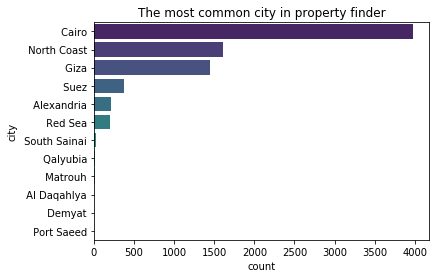

In [17]:
sb.countplot(data=df, y = 'city', palette='viridis', color = sb.color_palette()[0], 
             order=df['city'].value_counts().index).set_title('The most common city in property finder');

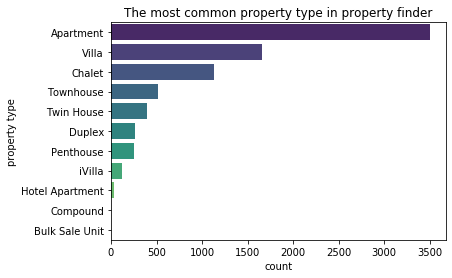

In [18]:
sb.countplot(data=df, y = 'property type', palette='viridis', color = sb.color_palette()[0], 
             order=df['property type'].value_counts().index).set_title('The most common property type in property finder');

In [19]:
df_new = df

from sklearn.preprocessing import LabelEncoder
encoders = list()
for i in df.columns:
    le = LabelEncoder()
    if i in ['property type','compound', 'district', 'city']:
        df_new[i] = le.fit_transform(df[i])
        encoders.append(le)
df_new

,property type,bedrooms,bathrooms,area,address,price,compound,district,city
0,0,3,3,239,"The Fourteen Golf Residences, Uptown Cairo, Mo...",4860000,943,233,2
1,9,4,4,571,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",10000000,180,213,4
2,0,2,2,134,"IL Bosco, New Capital Compounds, New Capital C...",100000,480,169,2
3,10,3,3,324,"Mountain View Hyde Park, 5th Settlement Compou...",3800000,679,22,2
4,9,5,6,560,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",26000000,180,213,4
...,...,...,...,...,...,...,...,...,...
7874,9,4,4,360,"Villette, 5th Settlement Compounds, The 5th Se...",15000000,986,22,2
7875,0,3,2,205,"Nagib Al Rehani St., Rehab City Third Phase, A...",1300000,689,200,2
7876,6,3,2,167,"Kayan, Sheikh Zayed Compounds, Sheikh Zayed Ci...",2800000,537,213,4
7877,2,3,3,100,"Hacienda Bay, Sidi Abdel Rahman, North Coast",2500000,456,217,6


In [20]:
# Split data to Train and Test Sets
df_new.drop(['address'],axis=1, inplace=True)
x=df_new.drop(['price'], axis=1)
y=df_new['price']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [25]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
}

In [26]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.26644633430270614
Test Score: 0.3888375500854409
RMSE: 6048007.563539537
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.5635404248990366
Test Score: 0.4811341554479156
RMSE: 5572647.028099704
-----------------------------------------------------------
Using model: SVR
Training Score: -0.06442890965095249
Test Score: -0.09610744307328045
RMSE: 8099543.784252453
-----------------------------------------------------------
Using model: DT
Training Score: 0.9924970646541266
Test Score: -0.4518083603474945
RMSE: 9321560.884285323
-----------------------------------------------------------
Using model: RF
Training Score: 0.9152889824055468
Test Score: 0.5434689656251795
RMSE: 5227200.357822375
-----------------------------------------------------------


In [27]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [28]:
y_pred = model.predict(x_test)
y_pred.astype(int)

array([14130000, 40400000,  9919977, ...,   258000, 22218104,   845017])

In [29]:
y_test

7614    33500000
7620    50000000
4405    10200000
2137     2150000
1894     1860000
          ...   
619      6500000
5553      780000
6865      270000
655      7500000
7718     1600000
Name: price, Length: 1575, dtype: int64

In [30]:
import joblib

In [31]:
joblib.dump(model, 'DTmodel.h5')

['DTmodel.h5']

In [32]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [33]:
n = 1
for i in encoders:
    joblib.dump(i, 'label_encoder{0}.joblib'.format(n))
    n += 1

In [34]:
x.columns

Index(['property type', 'bedrooms', 'bathrooms', 'area', 'compound',
       'district', 'city'],
      dtype='object')

In [35]:
test_data = ['Villa', 5, 5, 725, 'Zed Towers', ' The 5th Settlement', ' Cairo']

test_data[0] = encoders[0].transform([test_data[0]])
test_data[4] = encoders[1].transform([test_data[4]])
test_data[5] = encoders[2].transform([test_data[5]])
test_data[6] = encoders[3].transform([test_data[6]])

test_data

[array([9]), 5, 5, 725, array([1023]), array([230]), array([2])]

In [36]:
test_data = scaler.transform([test_data])

In [37]:
int(model.predict(test_data))

21900000